In [27]:
# Pyspark Project

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [28]:
from pyspark import SQLContext

In [29]:
sqlContext = SQLContext(sc)

In [30]:
df = sqlContext.read.csv("s3://msbx5420-2020/Team-Mount-Antero/news.csv", header=True)

In [31]:
df.show()

+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|_c0|             authors|               title|        publish_date|         description|                text|                 url|
+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  0|        ['Cbc News']|Coronavirus a 'wa...| 2020-03-27 08:00:00|Canadian pharmaci...|"Canadian pharmac...|"" he said.  Tadr...|
|  1|        ['Cbc News']|Yukon gov't names...| 2020-03-27 01:45:00|The Yukon governm...|"The Yukon govern...|  from March 9 to 13|
|  2|['The Associated ...|U.S. Senate passe...| 2020-03-26 05:13:00|The Senate has pa...|"The Senate late ...|"" said Democrati...|
|  3|        ['Cbc News']|Coronavirus: The ...| 2020-03-27 00:36:00|Scientists around...|"Scientists aroun...| "" said Zarychanski|
|  4|        ['Cbc News']|The latest on the...| 2020-03-26 20:57:00|The late

In [32]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publish_date: string (nullable = true)
 |-- description: string (nullable = true)
 |-- text: string (nullable = true)
 |-- url: string (nullable = true)



In [33]:
df.select("publish_date").show()

+--------------------+
|        publish_date|
+--------------------+
| 2020-03-27 08:00:00|
| 2020-03-27 01:45:00|
| 2020-03-26 05:13:00|
| 2020-03-27 00:36:00|
| 2020-03-26 20:57:00|
| 2020-03-27 08:00:00|
| 2020-03-27 08:00:00|
| 2020-03-26 11:02:00|
| 2020-03-26 14:55:00|
| 2020-03-27 08:00:00|
| 2020-03-26 14:18:00|
|            'Follow'|
| 2020-03-27 08:00:00|
| 'James Dunne On ...|
| 2020-03-26 12:00:00|
| 'He Spent Eight ...|
| 2020-03-27 08:30:00|
| 2020-03-11 00:15:00|
|         'Twitter']"|
| 2020-03-27 08:00:00|
+--------------------+
only showing top 20 rows



In [10]:
df.select("text").show()

+--------------------+
|                text|
+--------------------+
|"Canadian pharmac...|
|"The Yukon govern...|
|"The Senate late ...|
|"Scientists aroun...|
|"    Trudeau says...|
|"The continued ex...|
|Recent developmen...|
|Michigan hospital...|
|"The number of co...|
|"The Jewish Gener...|
|" Three Saskatche...|
|Manitoba chiefs o...|
|"This column is a...|
| 2020-03-27 08:00:00|
|"Alberta's TV and...|
|'Like a war zone'...|
|"A Memorial Unive...|
|"Manitoba is unde...|
| 2020-03-26 08:00:00|
|"New Brunswick ha...|
+--------------------+
only showing top 20 rows



In [36]:
df = df.withColumn("datetype", df["publish_date"].cast('date'))

df.select("datetype").show()

+----------+
|  datetype|
+----------+
|2020-03-27|
|2020-03-27|
|2020-03-26|
|2020-03-27|
|2020-03-26|
|2020-03-27|
|2020-03-27|
|2020-03-26|
|2020-03-26|
|2020-03-27|
|2020-03-26|
|      null|
|2020-03-27|
|      null|
|2020-03-26|
|      null|
|2020-03-27|
|2020-03-11|
|      null|
|2020-03-27|
+----------+
only showing top 20 rows



In [11]:
import string
import pyspark.sql.functions as F
from pyspark.sql.types import *

In [39]:
df = df.withColumn("weekOfYear",F.weekofyear(df["datetype"]))

df.select("weekOfYear").show()

+----------+
|weekOfYear|
+----------+
|        13|
|        13|
|        13|
|        13|
|        13|
|        13|
|        13|
|        13|
|        13|
|        13|
|        13|
|      null|
|        13|
|      null|
|        13|
|      null|
|        13|
|        11|
|      null|
|        13|
+----------+
only showing top 20 rows



In [40]:
def wordCount(wordString):
    res = sum([i.strip(string.punctuation).isalpha() for i in wordString.split()]) 
    return res

udfWC = F.udf(wordCount, IntegerType())

In [41]:
df_wc = df.withColumn("word count", udfWC("text"))

df_wc.select("word count").show()

+----------+
|word count|
+----------+
|       153|
|        97|
|       120|
|       239|
|       129|
|        43|
|      1747|
|       120|
|       206|
|       110|
|       315|
|         8|
|       289|
|         0|
|       147|
|        16|
|        63|
|       138|
|         0|
|        65|
+----------+
only showing top 20 rows



In [65]:
wkdf = df_wc.groupBy("weekOfYear").count().orderBy("count", ascending=False).limit(5)

wkdf.show()

+----------+-----+
|weekOfYear|count|
+----------+-----+
|        12| 1145|
|        13|  750|
|        11|  606|
|        10|  246|
|      null|  219|
+----------+-----+



In [66]:
import pandas as pd
import matplotlib.pyplot as plt

dfPD = df_wc.toPandas()


In [67]:
dfPD.head()

,_c0,authors,title,publish_date,description,text,url,datetype,weekOfYear,word count
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,"""Canadian pharmacies are limiting how much med...",""""" he said. Tadrous said pharmacies get their...",2020-03-27,13.0,153
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,"""The Yukon government has identified two place...",from March 9 to 13,2020-03-27,13.0,97
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,"""The Senate late Wednesday passed an unparalle...",""""" said Democratic Senate Minority Leader Chuc...",2020-03-26,13.0,120
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,"""Scientists around the world are racing to fin...",""""" said Zarychanski",2020-03-27,13.0,239
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,""" Trudeau says rules of Quarantine Act will...",""""" Prime Minister Justin Trudeau said today",2020-03-26,13.0,129


<Figure size 1080x1080 with 0 Axes>

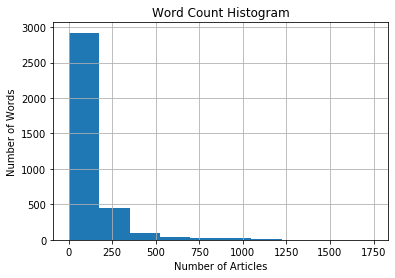

<Figure size 1080x1080 with 0 Axes>

In [26]:
dfPD["word count"].hist()
plt.title("Word Count Histogram")
plt.xlabel("Number of Articles")
plt.ylabel("Number of Words")
plt.figure(figsize=[15,15])

In [68]:
wkPD = wkdf.toPandas()

wkPD


,weekOfYear,count
0,12.0,1145
1,13.0,750
2,11.0,606
3,10.0,246
4,NaN,219
